<a href="https://colab.research.google.com/github/SamuelWanjiru/Covid-19_Global_Analysis_and_prediction/blob/main/Covid_19_Global_Analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='red'>🚑 <u>Covid-19 Global Analysis and prediction</u> 🏥**
 
In this article, i will be analysing global **<font color='blue'>confirmed cases</font>** and **<font color='red'>deaths</font>** using **python**.

I will then introduce you to a machine learning approach to predicting covid-19 cases for the next 30 days.

These types of predictive models help in providing an accurate **prediction of epidemics,** which is essential for obtaining information on the likely **spread** and consequences of **infectious diseases 🤢**.

**Governments** and other legislative bodies rely on these kinds of machine learning predictive models and ideas to suggest **new policies** and assess the effectiveness of applied policies.

The dataset used in this analysis is a daily updating version of [COVID-19 Data Repository](https://github.com/CSSEGISandData/COVID-19) from 2019 by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU).

For more information, click [here](https://covidbehaviors.org/).

## **<font color='blue'><u>Task </u>** 
Predicting covid-19 cases for the next 30 days using python.


**<font color='brown'>Pointers** : To install prohet model, use the code below
```
# pip install pystan==2.19.1.1 prophet
```

**<font color='red'>As a bonus, i will do an analysis of the covid-19 situation in kenya before carrying out the forecast. You can implement the same for your home country/your country of interest**

## **Connecting/mounting the google drive**

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Importing the relevant data analysis libraries**


In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import colorama
from colorama import Fore, Back, Style
from prophet import Prophet
from sklearn.metrics import r2_score

plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

### **Loading the datasets**

In [17]:
Global_Cases = pd.read_csv(r'/content/gdrive/My Drive/KAGGLE PROJECTS/Covid-19 Cases Analysis and Prediction/Data/CONVENIENT_global_confirmed_cases.csv')
Global_Deaths = pd.read_csv(r'/content/gdrive/My Drive/KAGGLE PROJECTS/Covid-19 Cases Analysis and Prediction/Data/CONVENIENT_global_deaths.csv')
continent = pd.read_csv(r'/content/gdrive/My Drive/KAGGLE PROJECTS/Covid-19 Cases Analysis and Prediction/Data/continents2.csv')

### **Understanding the data**

**Global Cases**

In [4]:
# Printing the 1st 5 observations
Global_Cases.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Printing the shape of the data
print("The covid-19 confirmed cases dataset has",Global_Cases.shape[0], 'rows and',Global_Cases.shape[1],'columns')

The covid-19 confirmed cases dataset has 1077 rows and 290 columns


In [11]:
# Getting the different data types of the columns
Global_Cases.dtypes

Country/Region           object
Afghanistan             float64
Albania                 float64
Algeria                 float64
Andorra                 float64
                         ...   
West Bank and Gaza      float64
Winter Olympics 2022    float64
Yemen                   float64
Zambia                  float64
Zimbabwe                float64
Length: 290, dtype: object

In [15]:
# Data descriptive statistics
Global_Cases.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
count,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,...,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000
mean,192.961896,310.234201,252.071561,44.378253,97.671933,0.010223,8.462825,9259.941450,414.475836,5306.138476,...,948.105019,231.614312,11.164498,511.722119,10711.278810,653.557621,0.497212,11.101301,311.023234,241.618030
std,336.478377,450.406666,338.336917,140.473767,244.790073,0.335341,32.891527,17576.116124,616.965699,8980.099172,...,2062.429962,270.222243,49.822605,597.178197,39519.460758,1734.604124,4.142238,23.137525,673.775534,702.689785
min,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-12934.000000,...,-21.000000,0.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-6.000000
25%,28.000000,18.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,252.750000,...,0.000000,27.000000,0.000000,29.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,77.000000,113.000000,149.500000,0.000000,27.000000,0.000000,0.000000,3463.500000,168.000000,1959.000000,...,87.000000,126.000000,0.000000,314.500000,309.000000,157.500000,0.000000,1.000000,54.000000,33.000000
75%,194.750000,495.000000,323.500000,37.000000,110.250000,0.000000,2.000000,11123.000000,544.750000,5551.750000,...,728.500000,352.500000,0.000000,864.750000,4363.000000,662.000000,0.000000,11.000000,251.250000,144.500000
max,3243.000000,4789.000000,2521.000000,2313.000000,5035.000000,11.000000,468.000000,139853.000000,4388.000000,64038.000000,...,13612.000000,1478.000000,616.000000,4418.000000,454212.000000,30356.000000,72.000000,287.000000,5555.000000,9185.000000


**Global Deaths**

In [5]:
Global_Deaths.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Printing the shape of the data
print("The covid-19 confirmed deaths dataset has",Global_Deaths.shape[0], 'rows and',Global_Deaths.shape[1],'columns')

The covid-19 confirmed deaths dataset has 1077 rows and 290 columns


In [14]:
# Getting the different data types of the columns
Global_Deaths.dtypes

Country/Region           object
Afghanistan             float64
Albania                 float64
Algeria                 float64
Andorra                 float64
                         ...   
West Bank and Gaza      float64
Winter Olympics 2022    float64
Yemen                   float64
Zambia                  float64
Zimbabwe                float64
Length: 290, dtype: object

In [16]:
# Data descriptive statistics
Global_Deaths.describe()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Austria,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
count,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.0,1076.000000,1076.000000,1076.000000,1076.000000,...,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.000000,1076.0,1076.000000,1076.000000,1076.000000
mean,7.294610,3.341078,6.394981,0.153346,1.793680,0.0,0.135688,120.976766,8.100372,19.929368,...,7.035316,1.521375,0.013011,5.420074,40.135688,5.304833,0.0,2.006506,3.739777,5.238848
std,16.033152,4.534501,7.528373,0.547041,3.110402,0.0,0.730842,185.257629,10.942350,26.740799,...,14.825956,2.125922,0.182535,6.840789,91.328837,11.250551,0.0,4.493608,9.838186,12.962257
min,0.000000,0.000000,0.000000,-2.000000,-3.000000,0.0,0.000000,0.000000,-2.000000,-81.000000,...,0.000000,0.000000,0.000000,-6.000000,-3.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,2.000000,1.000000,5.000000,0.000000,0.000000,0.0,0.000000,43.000000,4.000000,10.000000,...,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000
75%,6.000000,5.000000,9.000000,0.000000,3.000000,0.0,0.000000,179.250000,12.000000,29.000000,...,6.000000,3.000000,0.000000,8.000000,7.250000,7.000000,0.0,2.000000,3.000000,3.000000
max,159.000000,21.000000,49.000000,7.000000,30.000000,0.0,12.000000,3351.000000,70.000000,145.000000,...,88.000000,9.000000,5.000000,35.000000,804.000000,268.000000,0.0,60.000000,72.000000,107.000000


## **Data Preparation**

Now the next step is data preparation, I will simply prepare new data by combining the above datasets and then we will visualize a geographical plot of the data to see what we are going to work with:

In [18]:
world = pd.DataFrame({"Country":[],"Cases":[]})
world["Country"] = Global_Cases.iloc[:,1:].columns
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(Global_Cases[i][1:]).sum())
world["Cases"]=cases

country_list=list(world["Country"].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j==".":
            i = i[:sayac]
            country_list[idx]=i
        elif j=="(":
            i = i[:sayac-1]
            country_list[idx]=i
        else:
            sayac += 1
    idx += 1
world["Country"]=country_list
world = world.groupby("Country")["Cases"].sum().reset_index()
world.head()
continent["name"]=continent["name"].str.upper()
continent["name"]

0            AFGHANISTAN
1          ÅLAND ISLANDS
2                ALBANIA
3                ALGERIA
4         AMERICAN SAMOA
             ...        
244    WALLIS AND FUTUNA
245       WESTERN SAHARA
246                YEMEN
247               ZAMBIA
248             ZIMBABWE
Name: name, Length: 249, dtype: object

## **Data Visualization**

Now here I will prepare three visualizations. One will be a geographical visualization to visualize the worldwide spread of Covid-19. Then the next visualization will be to have a look at the daily cases of Covid-19 in the world. Then the last visualization will be to have a look at the daily death cases of Covid-19 in the world.

Now let’s start data visualization by looking at the worldwide spread of Covid-19:

In [78]:
world["Cases Range"]=pd.cut(world["Cases"],[-150000,50000,200000,800000,1500000,15000000],labels=["U50K","50Kto200K","200Kto800K","800Kto1.5M","1.5M+"])
alpha =[]
for i in world["Country"].str.upper().values:
    if i == "BRUNEI":
        i="BRUNEI DARUSSALAM"
    elif  i=="US":
        i="UNITED STATES" 
    if len(continent[continent["name"]==i]["alpha-3"].values)==0:
        alpha.append(np.nan)
    else:
        alpha.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Coutry"]=alpha

fig = px.choropleth(world.dropna(),
                   locations="Coutry",
                   color="Cases Range",
                   projection="mercator",
                   color_discrete_sequence=["#DBDFFD","#9BA3EB","#646FD4","#242F9B","#0A2647"]
                    )


                    
fig.update_geos(fitbounds="locations", visible=False)

fig.update_layout(
    title_text='Global Covid-19 Spread',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Author: <a href="https://github.com/SamuelWanjiru">\
            Samuel Mureithi Wanjiru</a>',
        showarrow = False
    )]
)
fig.show()

**Now let’s have a look at the daily cases all around the world:**

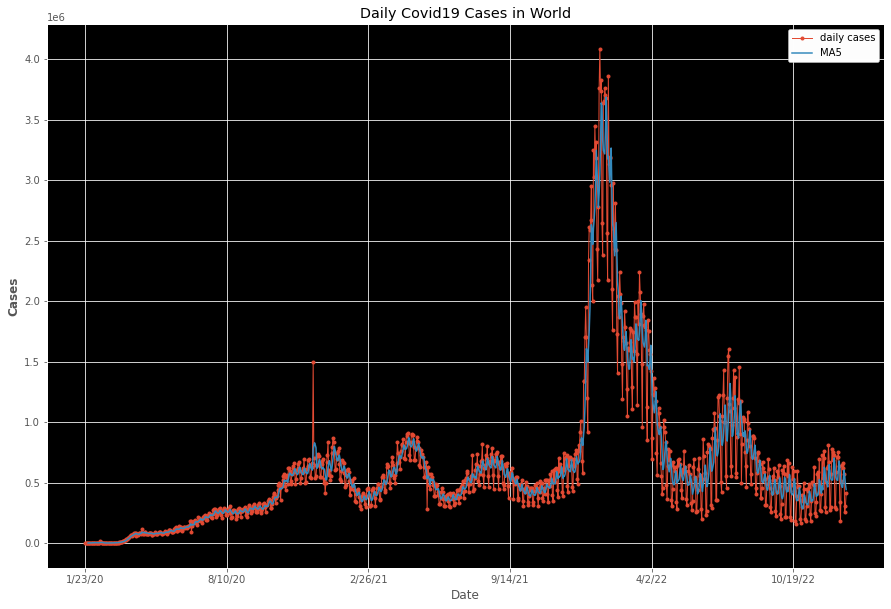

In [105]:
count = []
for i in range(1,len(Global_Cases)):
    count.append(sum(pd.to_numeric(Global_Cases.iloc[i,1:].values)))

df = pd.DataFrame()
df["Date"] = Global_Cases["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

count = []
for i in range(1,len(Global_Deaths)):
    count.append(sum(pd.to_numeric(Global_Deaths.iloc[i,1:].values)))

df["Deaths"] = count

df.Cases.plot(title="Daily Covid19 Cases in World",marker=".",figsize=(15,10),label="daily cases",linewidth=1)
df.Cases.rolling(window=5).mean().plot(figsize=(15,10),label="MA5")
plt.ylabel("Cases",fontweight='bold')
ax = plt.axes()
ax.set_facecolor("black")
plt.legend(facecolor='white', framealpha=2)
plt.show();

**Now let’s have a look at the daily death cases of Covid-19:**

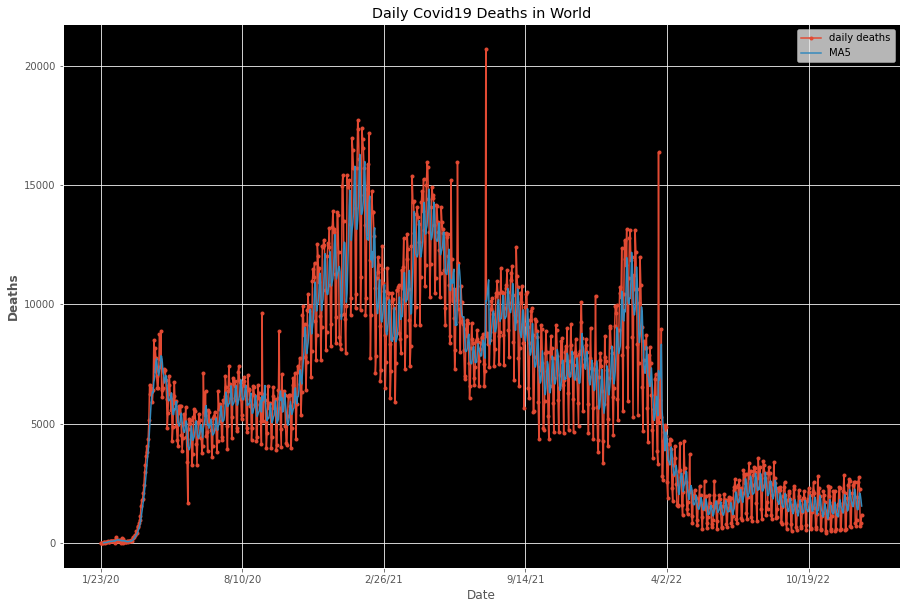

In [110]:
df.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(15,10),label="daily deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(15,10),label="MA5")
ax = plt.axes()
ax.set_facecolor("black")
plt.ylabel("Deaths",fontweight='bold')
plt.legend()
plt.show()

# **Bonus**

## **Lets Look at the situation in Kenya**

**Total Confirmed covid cases & Deaths in Kenya**

In [220]:
# Creating a dataframe for country Kenya
Kenya_cases = pd.DataFrame()
Kenya_cases['Date'] = Global_Cases["Country/Region"][1:]
Kenya_cases['Covid_Cases']=Global_Cases['Kenya']
Kenya_cases['Covid_Deaths'] = Global_Deaths['Kenya']

In [221]:
Kenya_cases.head()

,Date,Covid_Cases,Covid_Deaths
1,1/23/20,0.0,0.0
2,1/24/20,0.0,0.0
3,1/25/20,0.0,0.0
4,1/26/20,0.0,0.0
5,1/27/20,0.0,0.0


Cleaning the data

In [209]:
# Droping the missing value
Kenya_cases=Kenya_cases.dropna()

#Checking if there is any null value remaining
Kenya_cases.isna().sum()

Covid_Cases     0
Covid_Deaths    0
dtype: int64

**Kenyan covid-19 cases statistics**

In [210]:
print(Back.BLACK + Fore.WHITE +"There has been",sum(Kenya_cases['Covid_Cases']),"confimed covid-19 cases in kenya for the period between 2019 and January 2023.")


There has been 342511.0 confimed covid-19 cases in kenya for the period between 2019 and January 2023.


In [211]:
print(Back.BLACK + Fore.WHITE +"On average,",round(Kenya_cases['Covid_Cases'].mean(),0),"cases have been recorded in Kenya on a daily basis.")

On average, 318.0 cases have been recorded in Kenya on a daily basis.


In [212]:
print(Back.BLACK + Fore.WHITE + "There has been",sum(Kenya_cases['Covid_Deaths']),'deaths in Kenya from 2019 to January 2023.')
print('On average, Kenya has recorded',round(Kenya_cases['Covid_Deaths'].mean(),0),'deaths daily.')

There has been 5688.0 deaths in Kenya from 2019 to January 2023.
On average, Kenya has recorded 5.0 deaths daily.


### **<font color='blue'>I will now visualize the covid-19 cases and deaths in Kenya ⚡**

**1. Covid-19 Cases in Kenya**

In [247]:
fig = px.line(Kenya_cases,x='Date', y='Covid_Cases', title='Covid-19 Daily Cases',color_discrete_sequence=["blue"])
fig.update_xaxes(visible=False,showticklabels=False )
fig.show(config= dict(displayModeBar = False))

**2. Covid-19 Deaths in Kenya**

In [254]:
fig = px.line(Kenya_cases,x='Date', y='Covid_Deaths', title='Covid-19 Daily Deaths',color_discrete_sequence=["red"])
fig.update_xaxes(visible=False,showticklabels=False )
fig.show(config= dict(displayModeBar = False))

### **Lets tackle the task now: <font color='blue'>Predicting covid-19 cases for the next 30 days**

To tackle the task, i will use the prohet model to forecast covid-19 cases for the next 30 days.

**Defining a model function**

In [260]:
class prophet(object):
    def fit(self,data):
        
        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)
    
    def forecast(self,periods,freq):
        
        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)
        
    def plot(self,xlabel="Years",ylabel="Values"):
        
        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))
        
    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])


**Preparing the dataset for forecasting**

In [261]:
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values

**Fitting the model**

In [265]:
model = prophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2()

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_dfnhok4/pqkgv3s4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_dfnhok4/l22ibiqi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68115', 'data', 'file=/tmp/tmp_dfnhok4/pqkgv3s4.json', 'init=/tmp/tmp_dfnhok4/l22ibiqi.json', 'output', 'file=/tmp/tmp_dfnhok4/prophet_modeltjgaz3e5/prophet_model-20230104134949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:49:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:49:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.6327189835114662

**Forecasting covid 19 cases for the next 30 days**

In [291]:
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)

**Plotting the forecast**

In [288]:
fig = px.area(forecast,x=forecast.index, y='yhat', title='Covid-19 global forecast for 30 days',color_discrete_sequence=["teal"])
fig.update_xaxes(visible=True,showticklabels=True )
fig.show(config= dict(displayModeBar = False))